In [16]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import LabelEncoder

In [17]:
#Load dataset
df = pd.read_csv('titanic.csv')

In [4]:
import numpy as np

# Replace '\N' with NaN
df['Age'].replace('\\N', np.nan, inplace=True)

# Convert Age to numeric
df['Age'] = pd.to_numeric(df['Age'], errors='coerce')

# Fill missing Age with median
df['Age'].fillna(df['Age'].median(), inplace=True)

# Similarly handle Embarked if needed
df['Embarked'].replace('\\N', np.nan, inplace=True)
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

# Drop irrelevant columns
df.drop(['Cabin', 'Name', 'Ticket'], axis=1, inplace=True)

# Encode categorical variables
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Sex'] = le.fit_transform(df['Sex'])
df['Embarked'] = le.fit_transform(df['Embarked'])


C:\Users\Tamanna thakur\AppData\Local\Temp\ipykernel_12400\2843046304.py:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(), inplace=True)
C:\Users\Tamanna thakur\AppData\Local\Temp\ipykernel_12400\2843046304.py:13: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behav

In [5]:
# Encode categorical variables
le = LabelEncoder()
df['Sex'] = le.fit_transform(df['Sex'])  # Male=1, Female=0
df['Embarked'] = le.fit_transform(df['Embarked'])  # C=0, Q=1, S=2

In [6]:
# 4. Features and target
X = df[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']]
y = df['Survived']

In [7]:
# 5. Split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [18]:
# 6. Build Decision Tree Classifier
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [19]:
# 7. Predict
y_pred = dt.predict(X_test)

In [20]:
# 8. Evaluate model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.7821229050279329

Confusion Matrix:
 [[83 22]
 [17 57]]

Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.79      0.81       105
           1       0.72      0.77      0.75        74

    accuracy                           0.78       179
   macro avg       0.78      0.78      0.78       179
weighted avg       0.79      0.78      0.78       179



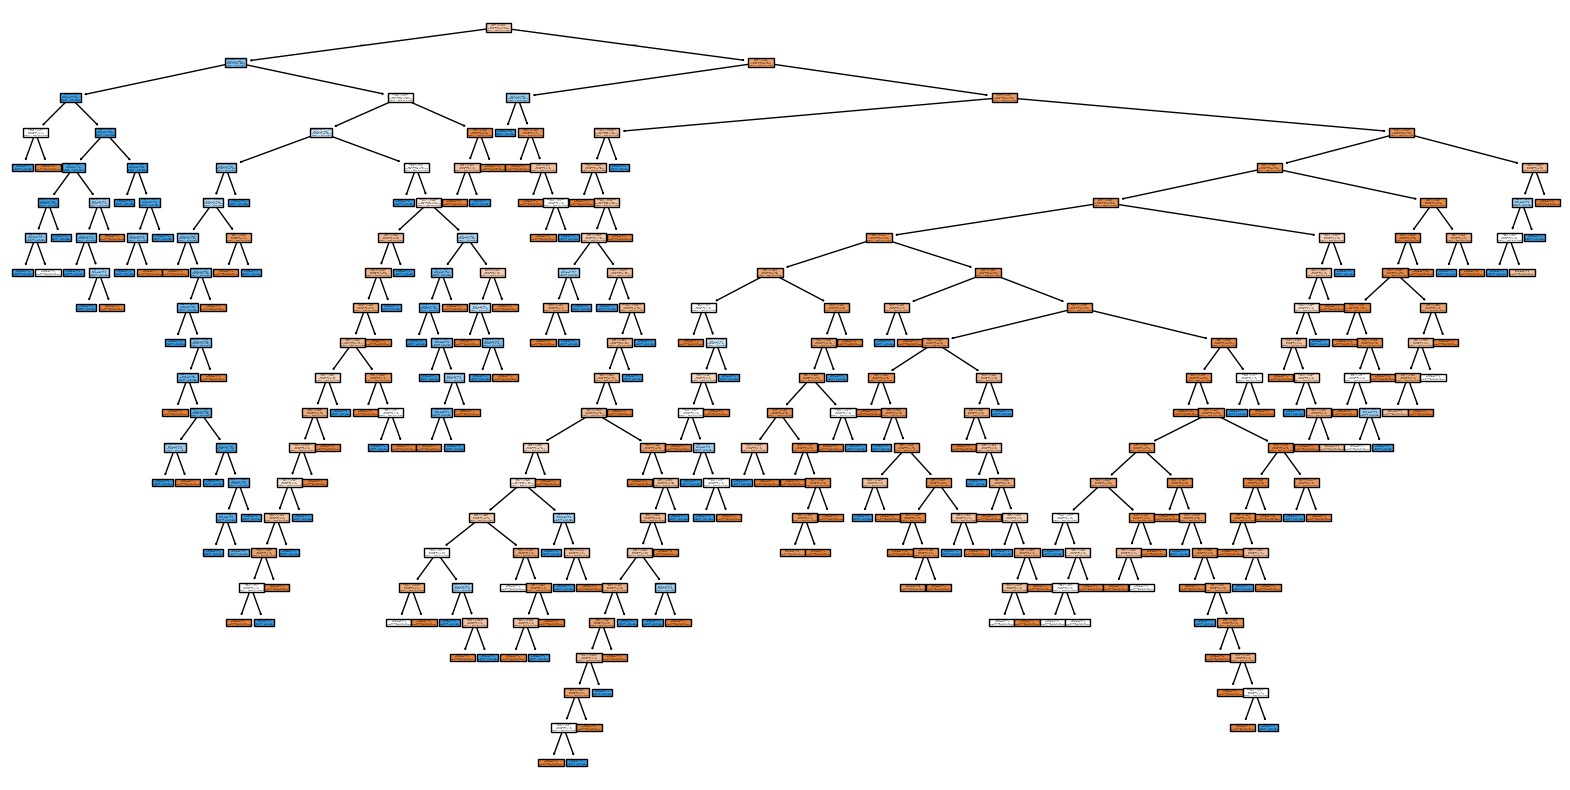

In [22]:
# Optional: Visualize the tree
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(20,10))
plot_tree(dt, feature_names=X.columns, class_names=['Not Survived','Survived'], filled=True)
plt.show()